In [44]:
import pandas as pd
from fredapi import Fred
import sys
import os
import matplotlib.pyplot as plt
# Add config module to sys path
sys.path.insert(0, os.path.abspath('../config'))


# Import API key
from api_keys import fred_api_key


In [3]:
fred = Fred(api_key=f'{fred_api_key}')

In [8]:
data_30year_mortgage = fred.get_series('MORTGAGE30US')

In [9]:
data_30year_mortgage.tail()

2023-11-09    7.50
2023-11-16    7.44
2023-11-22    7.29
2023-11-30    7.22
2023-12-07    7.03
dtype: float64

In [13]:
print(data_30year_mortgage.dtypes)
print(type(data_30year_mortgage))

float64
<class 'pandas.core.series.Series'>


In [16]:
data_30year_mortage_rates_10years = data_30year_mortgage.loc[(data_30year_mortgage.index > '2012-12-31') & 
                                                             (data_30year_mortgage.index < '2023-01-01') ]
data_30year_mortage_rates_10years

2013-01-03    3.34
2013-01-10    3.40
2013-01-17    3.38
2013-01-24    3.42
2013-01-31    3.53
              ... 
2022-12-01    6.49
2022-12-08    6.33
2022-12-15    6.31
2022-12-22    6.27
2022-12-29    6.42
Length: 522, dtype: float64

In [46]:
df = pd.DataFrame(data_30year_mortage_rates_10years)
df = df.rename(columns={0 : '30 Year Mortgage Rates'})
df.index.names = ['Date']
df.index = pd.to_datetime(df.index)
print(df.tail())
print(df.dtypes)

            30 Year Mortgage Rates
Date                              
2022-12-01                    6.49
2022-12-08                    6.33
2022-12-15                    6.31
2022-12-22                    6.27
2022-12-29                    6.42
30 Year Mortgage Rates    float64
dtype: object


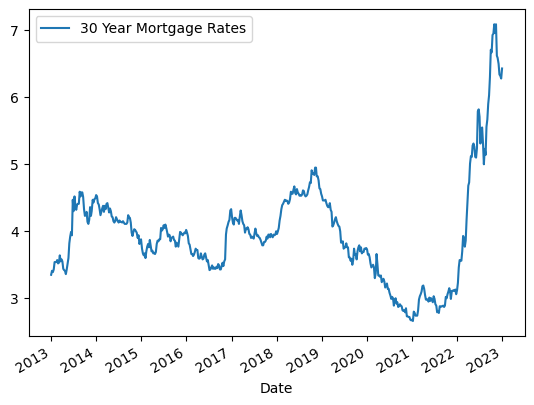

In [45]:
df.plot(y='30 Year Mortgage Rates', kind='line', use_index=True)
plt.show()